# Chapter 2: Statistical learning

## What is Statistical Learning
Examples that show the motivation to use statistical learning

In [1]:
# =======
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
plt.style.use('seaborn-white')

### Advertising Data
Let's have a look at the "Advertising" data set.
The data consists of product sales from 200 markets and their associated tv, radio, and newspaper advertising budgets.

In [2]:
# =======
# reade data set using pandas
df_adv = pd.read_csv('../data/Advertising.csv')

# returns the first 10 rows
df_adv.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


What kind of relationship can be seen between advertising budget and sales?  
Let's recreate Figure 2.1

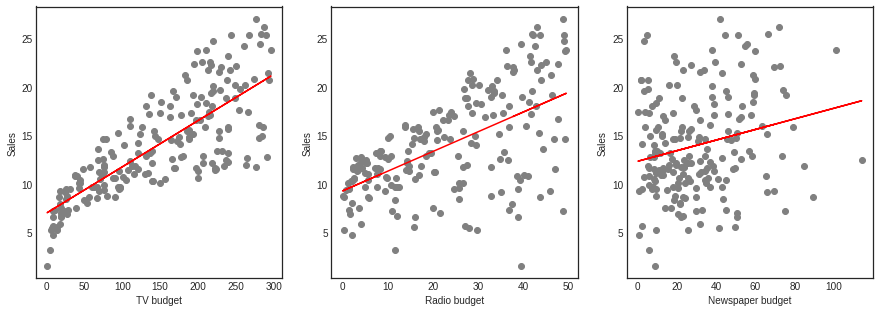

In [62]:
# import modules for least square
from sklearn.linear_model import LinearRegression

# =======
# plot Figure 2.1

fig, axs = plt.subplots(1, 3, figsize=(15,5))

for axis, ii in zip([0, 1, 2], ['TV', 'Radio', 'Newspaper']):
    axs[axis].scatter(df_adv[ii], df_adv['Sales'], color='gray')
    
    # plot least square fir
    linear_regressor = LinearRegression() 
    # sklearn model wants 2D array as input
    X = np.asarray(df_adv[ii]).reshape(-1,1)
    Y = df_adv['Sales']
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    axs[axis].plot(X, Y_pred, color='red')

    # plot axis label
    axs[axis].set_ylabel("Sales")
    axs[axis].set_xlabel(ii + " budget")

## General form of linear model

We can quantify the relationship between input (in this case TV, Radio or Newspaper burdgets) and output (Sales) with the following linear model  
$$Y = f(X) + \epsilon$$  
Where $X$ is the input matrix of predictors and $\epsilon$ is some random error. $f$ is some fixed but unknown systematic relation between $X$ and $Y$. Statistical learning is trying to approximate this function $f$.  
  

In the case with the advertistment data: $Sales = \beta_0 + \beta_1TV + \epsilon$  
where, Y (Sales) - Dependent variable  
X (TV) - Independent variable  
$\beta_0$ - Intercept  
$\beta_1$ - Slope  
$\epsilon$ - Error  